# Ví dụ B.3(Bài tập tự thực hành)

In [76]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
from scipy import sparse

In [51]:
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [52]:
softmax = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
softmax.fit(X_train, y_train)
y_pred = softmax.predict(X_test)


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [53]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.823342175066313
Confusion matrix:
 [[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 78  6  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 67  4  1  4  1  1  0  0  1  3  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2 82  4  0  1  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 86  1  0  0  0  1  1  0  0  0  1  0]
 [ 0  1  0  1  0  1  2  0  0 87  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 84  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  0  0  0  0  3 88  1  0  0  0  0]
 [ 2  3 

# Ví dụ B.4 (Bài tập tự thực hành 3)

In [54]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_5/data/glass.csv - glass.csv.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


In [56]:
glass_types = df['Type'].unique()
print(df['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [57]:
X = df[df.columns[:-1]]
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
glass = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)
glass.fit(X_train, y_train)
y_pred = glass.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')


Accuracy: 0.9814814814814815
Confusion matrix: 
 [[13  1  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Ví dụ 4

In [77]:
import os
import numpy as np
import pandas as pd
# set names to the paths because they're too long
data_path = '/home/vitquay1708/Study_Space/ml/week_5/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [60]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):

# read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')
  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)
  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)

  real_num = num_images if not shuffle else (60000 if _is else 10000)
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)
  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)
  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)
  labels = np.zeros((real_num)).astype(np.int64)
  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
  # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)
    images = images[rand_id, :]
    labels = labels[rand_id,]
  # change images data to type of vector 28x28 dimentional
  images = images.reshape(num_images, image_size * image_size)
  return images, labels

In [85]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

/tmp/ipykernel_5578/3004177588.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [62]:
def get_image(image):
  return image.reshape(28, 28)
# These methods are from Vi du 1
def convert_labels(y, C):
  from scipy import sparse
  Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z / e_Z.sum(axis = 0)
  return A
def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  A = e_Z / e_Z.sum(axis = 0)

  return A
def pred(W, X):
  A = softmax_stable(W.T.dot(X))
  return np.argmax(A, axis = 0)

In [67]:
def _softmax_regression(X, Y, theta, lambda_=0.5,iterations=20, learning_rate=1e-5, batch_size=200):
  from sklearn.metrics import log_loss
  losses = []
  _theta = theta
  d, N = X.shape
  for iter_ in range(iterations):
    shuffle_index = np.random.permutation(N)
    for i in shuffle_index:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(10, 1)
      ai = softmax_stable(np.dot(_theta.T, xi))
      _theta += learning_rate * xi.dot((yi - ai).T)
      Y_hat = softmax_stable(np.dot(_theta.T, X))
      if (iter_ * N + i) % batch_size == 0:
        losses.append(log_loss(Y, Y_hat))
    print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
  return _theta, losses

1 5


<Figure size 640x480 with 0 Axes>

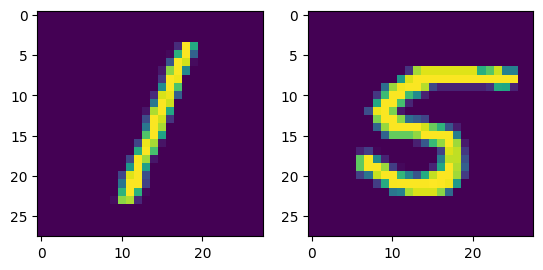

In [68]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

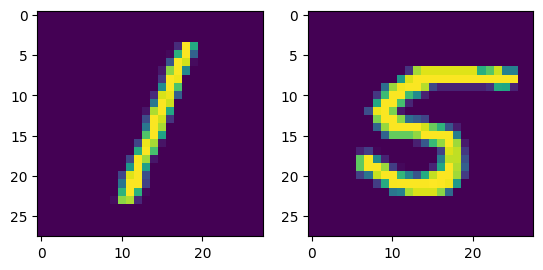

In [69]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),
axis = 0)

Y_train = convert_labels(train_labels, 10)

print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [70]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 0 - cost 0.3482021591155448


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 1 - cost 0.19543820643895773


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 2 - cost 0.1979319267172533


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 3 - cost 0.28249342692722684


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 4 - cost 0.2339007431209759


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 5 - cost 0.23629070038733563


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 6 - cost 0.16115067667807118


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 7 - cost 0.14880966711742075


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 8 - cost 0.17917422939828181


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 9 - cost 0.1349890577014393


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 10 - cost 0.21536332854806742


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 11 - cost 0.13173226010701405


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 12 - cost 0.1263673047447714


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 13 - cost 0.09293354309441923


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 14 - cost 0.11775703440368554


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 15 - cost 0.10804926390711173


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 16 - cost 0.06693694774397739


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 17 - cost 0.19630414900125556


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 18 - cost 0.09080397713451814


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabi

epoch 19 - cost 0.07438843535967996
training success:  (785, 10) 500


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [71]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels,
pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),
axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,

pred(opt_theta, X_test)))

accuracy training data:  0.9556
(785, 10000)
accuracy testing data:  0.8782


## 1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

[2 8 4 ... 2 6 9]


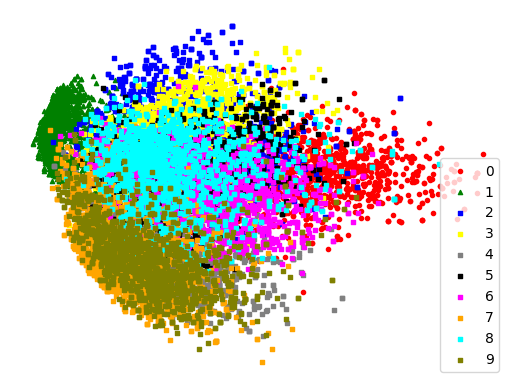

In [79]:
image_data = np.concatenate((train_images, test_images), axis = 0)
image_labels = np.concatenate((train_labels, test_labels), axis = 0)
print(image_labels)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(image_data))
plt.axis("off")
plt.scatter(transformed[image_labels==0][0], transformed[image_labels==0][1], s=9, label='0', c='red')
plt.scatter(transformed[image_labels==1][0], transformed[image_labels==1][1], s=9, label='1', c='green', marker="^")
plt.scatter(transformed[image_labels==2][0], transformed[image_labels==2][1], s=9, label='2', c='blue', marker="s")
plt.scatter(transformed[image_labels==3][0], transformed[image_labels==3][1], s=9, label='3', c='yellow', marker="s")
plt.scatter(transformed[image_labels==4][0], transformed[image_labels==4][1], s=9, label='4', c='gray', marker="s")
plt.scatter(transformed[image_labels==5][0], transformed[image_labels==5][1], s=9, label='5', c='black', marker="s")
plt.scatter(transformed[image_labels==6][0], transformed[image_labels==6][1], s=9, label='6', c='magenta', marker="s")
plt.scatter(transformed[image_labels==7][0], transformed[image_labels==7][1], s=9, label='7', c='#FFA500', marker="s")
plt.scatter(transformed[image_labels==8][0], transformed[image_labels==8][1], s=9, label='8', c='#00FFFF', marker="s")
plt.scatter(transformed[image_labels==9][0], transformed[image_labels==9][1], s=9, label='9', c='#808000', marker="s")
plt.legend()
plt.show()

## b) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả.

In [87]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

/tmp/ipykernel_5578/3004177588.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [92]:
mnist_model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)
mnist_model.fit(train_images, train_labels)
print(train_images.shape)
print(train_labels.shape)
image_pred = mnist_model.predict(test_images)
print(f'Accuracy: {accuracy_score(y_true=test_labels, y_pred=image_pred)}')

/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


(5000, 784)
(5000,)
Accuracy: 0.8836


/home/vitquay1708/Study_Space/ml/ml/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
